# Deep Learning Final Project

### Group Members:
- McKade Thomas
- Brian Nalley

In [2]:
!pip install skorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 193 kB 4.7 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import tensorflow as tf

import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from skorch import NeuralNetRegressor

In [74]:
# Read in the data
df = pd.read_csv("steel_data_5_classes.csv")
# df.head()

# Change int cols to categorical
cat_cols = ['class', 'WeekStatus_Weekday', 'WeekStatus_Weekend', 'Day_of_week_Friday',
            'Day_of_week_Monday', 'Day_of_week_Saturday', 'Day_of_week_Sunday',
            'Day_of_week_Thursday', 'Day_of_week_Tuesday', 'Day_of_week_Wednesday',
            'Load_Type_Light_Load', 'Load_Type_Maximum_Load', 'Load_Type_Medium_Load']

for col in cat_cols:
    df[col] = df[col].astype('category')

In [75]:
len(df)

35040

## EDA

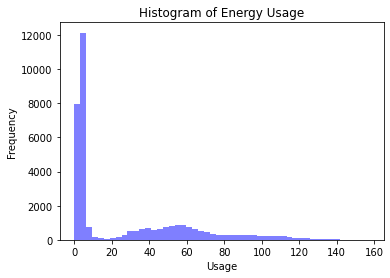

In [83]:
# EDA - McKade
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.title('Histogram of Energy Usage')
n, bins, patches = plt.hist("Usage", 50, data = df, facecolor='blue', alpha=0.5)

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [84]:
df.describe()

,Usage,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2.tCO2.,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


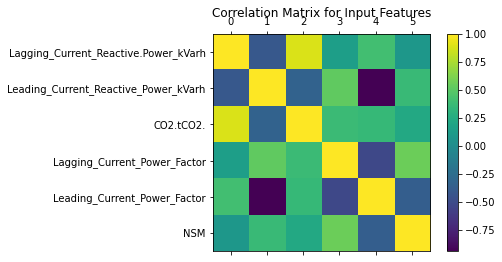

In [85]:
figure = plt.figure()
axes = figure.add_subplot(111)
 
# using the matshow() function
caxes = axes.matshow(df.loc[:, df.columns != "Usage"].corr())
figure.colorbar(caxes)
 
# axes.set_xticklabels(['']+df.loc[:, df.columns != "Usage"].columns)
axes.set_yticklabels(['']+df.loc[:, df.columns != "Usage"].columns)
plt.title('Correlation Matrix for Input Features')
plt.show()

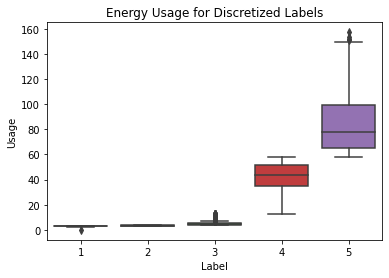

In [86]:
# plt.figure(figsize=(8,5))
sns.boxplot(x='class',y='Usage',data=df)
plt.title("Energy Usage for Discretized Labels")
plt.xlabel('Label')
plt.show()

## Prepare the Data

In [76]:
#Setting a seed for torch
torch.manual_seed(14296) 

# Test-train split
X = df.drop(['class'], axis = 1)
y = torch.tensor(df['class'].values.astype(np.float32))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

y_cont_train = X_train["Usage"].to_numpy()
y_cont_test = X_test["Usage"].to_numpy()
X_train = torch.tensor(X_train.drop(['Usage'], axis = 1).values)
X_test = torch.tensor(X_test.drop(['Usage'], axis = 1).values)

## Perform the Simulation

In [ ]:
# Model with one hidden layer
class NeuralNet1(nn.Module):
    
    def __init__(self, hidden_size: int, input_size: int = 18):
        super(NeuralNet1, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size,1)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [77]:
# Model with two hidden layers
class NeuralNet2(nn.Module):
    
    def __init__(self, hidden_size: int, input_size: int = 18):
        super(NeuralNet2, self).__init__()

        self.fc1 = nn.Linear(input_size,hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):

        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [90]:
# Model with two hidden layers
class NeuralNet3(nn.Module):
    def __init__(self, hidden_size: int, input_size: int = 18):
        super(NeuralNet3, self).__init__()
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size,hidden_size)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

In [78]:
class LinearRegression(nn.Module):
    def __init__(self,input_size = 1, output_size = 1):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self,x):
        return self.linear(x)

In [ ]:
# class MultiTaskModule(nn.Module):
#     '''This module should be able to take any number of layers and dimensions. For instance, 
#     if hidden_dims = [100, 100] the architecture should have two hidden layers with 100 neurons each. 
#     If hidden_dims = [200, 100, 80] your code should generate 3 hidden layers.'''
    
#     def __init__(self, input_dim, hidden_dims, z_dim, output_dim):
#         super().__init__()

#         self.layers = [nn.Linear(input_dim, hidden_dims[0])]
        
#         for i in range(len(hidden_dims)-1):
#             self.layers.append(nn.Linear(hidden_dims[i], hidden_dims[i+1]))
        
#         self.layers.append(nn.Linear(hidden_dims[-1], output_dim))
#         self.classifier = nn.ModuleList(self.layers)
        
        
#         self.R_layers = []
#         for i in range(len(hidden_dims)):
#             self.R_layers.append(nn.Linear(hidden_dims[i], z_dim))
            
#         self.regularization = nn.ModuleList(self.R_layers)
#         self.nl = nn.ReLU()
#         # self.lact = nn.Softmax()
               
#     def forward(self, x, noise = 0):
        
#         C = []
#         for i, l in enumerate(self.classifier):
#             if i < 1:          
#                 x = l(x)
#             elif  i == len(self.classifier)-1: 
#                 # x = self.lact(l(x))
#                 x = l(x)
#             else:
#                 x = self.nl(l(x))
#             C.append(x)
        
#         R = []
#         for i, l in enumerate(self.regularization):
#             x = l(C[i])
#             R.append(x)
        
#         '''The output of the forward pass should be a list "R" that contains all the mappings from the inner layers to 
#         the reference embeddings, and a classification activations'''
#         return R, C[-1]

Tuning Hyperparameters (Learning Rate & Hidden Size)

In [ ]:
model = NeuralNetRegressor(module = NeuralNet2(hidden_size = 100), 
                             max_epochs = 30,
                             criterion = nn.MSELoss, 
                             optimizer = torch.optim.Adam,
                             lr = 0.001,
                             batch_size = 128,
                             optimizer__weight_decay = 0.001,
                             verbose=0)

In [79]:
model = NeuralNetRegressor(module = NeuralNet2(hidden_size = 40), 
                             max_epochs = 30,
                             criterion = nn.MSELoss, 
                             optimizer = torch.optim.Adam,
                             lr = 0.001,
                             batch_size = 128,
                             optimizer__weight_decay = 0.001,
                             verbose=0)
model.fit(X_train.float(), y_train.reshape(-1,1))
y_preds = model.predict(X_test.float())

In [91]:
model = NeuralNetRegressor(module = NeuralNet3(hidden_size = 40), 
                             max_epochs = 30,
                             criterion = nn.MSELoss, 
                             optimizer = torch.optim.Adam,
                             lr = 0.001,
                             batch_size = 128,
                             optimizer__weight_decay = 0.001,
                             verbose=0)
model.fit(X_train.float(), y_train.reshape(-1,1))
y_preds = model.predict(X_test.float())

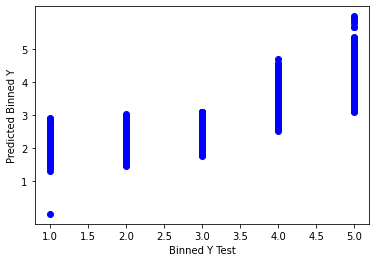

In [94]:
# plot of y_preds vs y_test
fig, ax = plt.subplots() 
ax.set_ylabel('Predicted Binned Y') 
ax.set_xlabel('Binned Y Test') 
ax.scatter(y_test, y_preds, color = 'blue')
ax.set_yticks(np.arange(1,6,1))

In [81]:
binned_rmse = []

model = NeuralNetRegressor(module = NeuralNet2(hidden_size = 100), 
                             max_epochs = 50,
                             criterion = nn.MSELoss, 
                             optimizer = torch.optim.Adam,
                             lr = 0.001,
                             batch_size = 128,
                             optimizer__weight_decay = 0.001,
                             verbose=0)

model.fit(X_train.float(), y_train.reshape(-1,1))
y_preds = model.predict(X_test.float())

binned_rmse.append(np.sqrt(mean_squared_error(y_preds, y_test.float())))

LM = NeuralNetRegressor(module = LinearRegression(1,1),
                        max_epochs = 50,
                         criterion = nn.MSELoss, 
                         optimizer = torch.optim.Adam,
                         lr = 0.001,
                         batch_size = 128,
                         optimizer__weight_decay = 0.001,
                         verbose=0
                       )
## Pytorch
LM.fit(torch.tensor(y_preds).float(), torch.tensor(y_cont_test).float().reshape(-1,1))
cont_preds = LM.predict(y_preds)

In [95]:
binned_rmse = []

model = NeuralNetRegressor(module = NeuralNet3(hidden_size = 100), 
                             max_epochs = 50,
                             criterion = nn.MSELoss, 
                             optimizer = torch.optim.Adam,
                             lr = 0.001,
                             batch_size = 128,
                             optimizer__weight_decay = 0.001,
                             verbose=0)

model.fit(X_train.float(), y_train.reshape(-1,1))
y_preds = model.predict(X_test.float())

binned_rmse.append(np.sqrt(mean_squared_error(y_preds, y_test.float())))

LM = NeuralNetRegressor(module = LinearRegression(1,1),
                        max_epochs = 50,
                         criterion = nn.MSELoss, 
                         optimizer = torch.optim.Adam,
                         lr = 0.001,
                         batch_size = 128,
                         optimizer__weight_decay = 0.001,
                         verbose=0
                       )
## Pytorch
LM.fit(torch.tensor(y_preds).float(), torch.tensor(y_cont_test).float().reshape(-1,1))
cont_preds = LM.predict(y_preds)

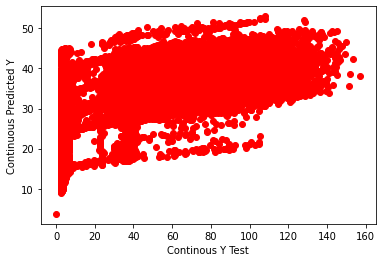

In [96]:
#plot of cont_preds against y_cont_test
fig, ax = plt.subplots() 
ax.set_ylabel('Continuous Predicted Y') 
ax.set_xlabel('Continous Y Test') 
ax.scatter(y_cont_test, cont_preds, color = 'red')

In [ ]:
# Grid Search

grid = {
    'lr': [0.001, 0.005],
    'batch_size': [64, 128, 256],
    'optimizer__weight_decay': [0.001, 0.005],
    'max_epochs':  [50, 100, 200]
}

gs = GridSearchCV(model, grid, refit = True, cv = 5, scoring = 'neg_root_mean_squared_error')

In [ ]:
# Hidden size of 100

gs.fit(X_train.float(), y_train.reshape(-1, 1))

#Report Best Parameters
print(gs.best_score_, gs.best_params_)

-0.8074759006500244 {'batch_size': 128, 'lr': 0.001, 'max_epochs': 50, 'optimizer__weight_decay': 0.001}


With 30 epochs, best learning rate was 0.005, with 50 epochs it was 0.001.  RMSE decreased from 0.0948 to 0.847 from 30 to 50 epochs.  Even when compared with 100 and 200 epochs, 50 performed best, with the same hyperparameters as earlier, now with a RMSE of 0.807.

In [ ]:
# Run Monte Carlo Simulation
def run_simulation(MC: int, hidden_sizes: list, epochs: int = 10) -> None:
    """
    Repeats the modeling process MC times and visualizes the results.
    - param MC: number of times to run the simulation.
    - param hidden_sizes: contains the values for the hidden size layer of the network.
    - param epochs: the number of epochs for the network to train on.
    """
    print(f'STARTING SIMULATION WITH {len(hidden_sizes)} SIZES...')
    full_timer = time.perf_counter()
    all_binned_rmse = []
    all_cont_rmse = []

    for i in range(0, MC):
        timer = time.perf_counter()
        a = []
        b = []
        print(f'--Begin Iteration {i+1} / {MC}')
        a, b = run_model(hidden_sizes)
        all_binned_rmse.append(a)
        all_cont_rmse.append(b)
        print(f'----Completed in {round(time.perf_counter() - timer,2)}s')
    
    binned_df = pd.DataFrame(all_binned_rmse)
    cont_df = pd.DataFrame(all_cont_rmse)
    print(f'----Binned RMSE: {binned_df.mean(axis=0)}')
    print(f'----Cont RMSE: {cont_df.mean(axis=0)}')
    plot_results(hidden_sizes, binned_df.mean(axis=0), cont_df.mean(axis=0))
    print(f'SIMULATION COMPLETED IN {round(time.perf_counter() - full_timer,2)}s')
    
def run_model(hidden_sizes: list, epochs: int = 10) -> list:
    """
    Creates a neural network with a single hidden layer of a given size trained 
    on synthetic binned labels and compares performance for the NN and a LM trained
    on the predictions from the NN that learns the original continuous response.
    - param hidden_sizes: Contains the values for the hidden size layer of the network.
    - param epochs: Number of epochs for the network to train on.
    
    - return: A list of two lists. The first list is the RMSE for each binned model, the
        second list is the RMSE for each continuous model.
    """
    binned_rmse = []
    cont_rmse = []
    for size in hidden_sizes:
        model = NeuralNetRegressor(module = NeuralNet2(hidden_size = size), 
                             max_epochs = epochs,
                             criterion = nn.MSELoss, 
                             optimizer = torch.optim.Adam,
                             lr = 0.001,
                             batch_size = 128,
                             optimizer__weight_decay = 0.001,
                             verbose=0)

        model.fit(X_train.float(), y_train.reshape(-1, 1))
        y_preds = model.predict(X_test.float())
#         print(np.isnan(y_preds.any()))
#         print(np.isfinite(y_preds.any()))
        binned_rmse.append(np.sqrt(mean_squared_error(y_preds, y_test.float())))
        LM = NeuralNetRegressor(module = LinearRegression(1,1),
                                max_epochs = epochs,
                                 criterion = nn.MSELoss, 
                                 optimizer = torch.optim.Adam,
                                 lr = 0.001,
                                 batch_size = 128,
                                 optimizer__weight_decay = 0.001,
                                 verbose=0
                               )
        ## Pytorch
        LM.fit(torch.tensor(y_preds).float(), torch.tensor(y_cont_test).float().reshape(-1,1))
        cont_preds = LM.predict(y_preds)
        ## Sklearn
#         reg = LinearRegression().fit(y_preds, y_cont_test)
#         cont_preds = reg.predict(y_preds)
        cont_rmse.append(np.sqrt(mean_squared_error(cont_preds, y_cont_test)))
    return [binned_rmse, cont_rmse]

def plot_results(hidden_sizes: list, binned_rmse: list, cont_rmse: list) -> None:
    """
    Visualizes the performance of the binned models vs the continuous.
    - param hidden_sizes: Contains the values for the hidden size layer of the network.
    - binned_rmse: Contains the RMSE for each value of hidden_size for the binned model, 
        averaged across MC simulations.
    - cont_rmse: Contains the RMSE for each value of hidden_size for the continuous model, 
        averaged across MC simulations.
    """
    min_binned = np.argmin(binned_rmse)
    min_cont = np.argmin(cont_rmse)
    fig, ax1 = plt.subplots() 
    ax1.set_xlabel('Log10 Hidden Size') 
    ax1.set_ylabel('Binned RMSE', color = 'blue', alpha = 0.5) 
    ax1.plot(np.log10(hidden_sizes), binned_rmse, color = 'blue', alpha = 0.5)
    ax1.axvline(np.log10(hidden_sizes[min_binned]), color = 'blue', ls = 'dashed')
    ax1.tick_params(axis ='y', labelcolor = 'blue') 

    ax2 = ax1.twinx() 
    ax2.set_ylabel('Continuous RMSE', color = 'red', alpha = 0.5) 
    ax2.plot(np.log10(hidden_sizes), cont_rmse, color = 'red', alpha = 0.5)
    ax2.axvline(np.log10(hidden_sizes[min_cont]), color = 'red', ls = 'dashed')  
    ax2.tick_params(axis ='y', labelcolor = 'red')
    plt.show()
    
##TODO: Check scatterplot of preds vs true
##TODO: 

STARTING SIMULATION WITH 60 SIZES...
--Begin Iteration 1 / 2
----Completed in 383.52s
--Begin Iteration 2 / 2
----Completed in 374.49s
----Binned RMSE: 0     2.126411
1     1.501643
2     1.820141
3     2.270607
4     2.175245
5     1.426715
6     2.704439
7     1.534534
8     1.438872
9     2.000069
10    1.579138
11    2.043282
12    1.077830
13    2.281479
14    1.374946
15    1.446059
16    1.273777
17    1.851661
18    1.461330
19    1.334018
20    1.684882
21    1.101394
22    1.332288
23    1.589978
24    1.554867
25    1.307173
26    6.423976
27    1.317275
28    1.707945
29    1.154540
30    1.680894
31    3.254846
32    1.567855
33    1.889099
34    3.343105
35    1.980064
36    1.899307
37    1.972897
38    1.300236
39    1.586312
40    2.029140
41    1.980682
42    2.136429
43    4.350653
44    8.151073
45    5.284857
46    1.227079
47    1.505408
48    3.374414
49    5.200469
50    1.802465
51    7.575781
52    3.024168
53    1.687874
54    2.179607
55    3.038040
56    4.

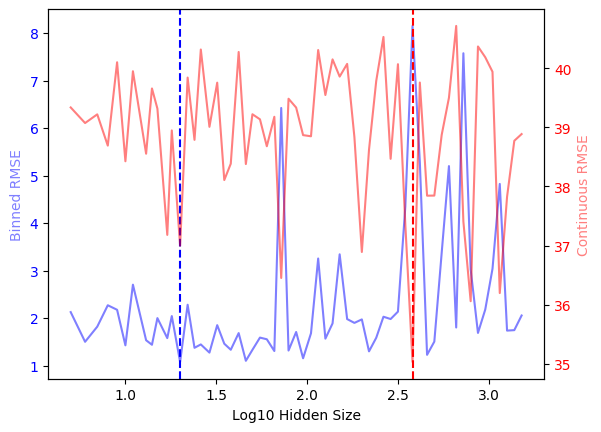

SIMULATION COMPLETED IN 758.17s


In [ ]:
hidden = np.unique([round(10**x) for x in np.arange(0.70, 3.2, 0.04)])
run_simulation(MC = 20, hidden_sizes = hidden, epochs=50)

STARTING SIMULATION WITH 30 SIZES...
--Begin Iteration 1 / 50
----Completed in 33.87s
--Begin Iteration 2 / 50
----Completed in 33.63s
--Begin Iteration 3 / 50
----Completed in 33.86s
--Begin Iteration 4 / 50
----Completed in 33.94s
--Begin Iteration 5 / 50
----Completed in 33.65s
--Begin Iteration 6 / 50
----Completed in 33.82s
--Begin Iteration 7 / 50
----Completed in 33.93s
--Begin Iteration 8 / 50
----Completed in 33.91s
--Begin Iteration 9 / 50
----Completed in 33.95s
--Begin Iteration 10 / 50
----Completed in 33.78s
--Begin Iteration 11 / 50
----Completed in 33.95s
--Begin Iteration 12 / 50
----Completed in 33.78s
--Begin Iteration 13 / 50
----Completed in 33.89s
--Begin Iteration 14 / 50
----Completed in 33.76s
--Begin Iteration 15 / 50
----Completed in 33.86s
--Begin Iteration 16 / 50
----Completed in 34.28s
--Begin Iteration 17 / 50
----Completed in 33.99s
--Begin Iteration 18 / 50
----Completed in 34.11s
--Begin Iteration 19 / 50
----Completed in 33.92s
--Begin Iteration 20 /

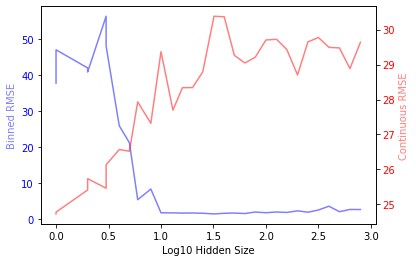

SIMULATION COMPLETED IN 1698.41s


In [ ]:
hidden = [round(10**x) for x in np.arange(0.70, 3, 0.04)]
run_simulation(MC = 50, hidden_sizes = hidden, epochs=50)

STARTING SIMULATION WITH 8 SIZES...
--Begin Iteration 1 / 5
----Completed in 21.0s
--Begin Iteration 2 / 5
----Completed in 23.49s
--Begin Iteration 3 / 5
----Completed in 23.5s
--Begin Iteration 4 / 5
----Completed in 22.92s
--Begin Iteration 5 / 5
----Completed in 23.21s


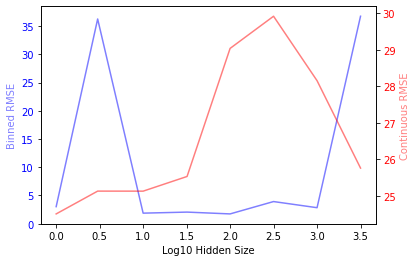

SIMULATION COMPLETED IN 114.34s


In [ ]:
hidden = [round(10**x) for x in np.arange(0, 4, 0.5)]
run_simulation(MC = 5, hidden_sizes = hidden, epochs=50)

STARTING SIMULATION WITH 8 SIZES...
--Begin Iteration 1 / 5
----Completed in 23.49s
--Begin Iteration 2 / 5
----Completed in 23.21s
--Begin Iteration 3 / 5
----Completed in 23.14s
--Begin Iteration 4 / 5
----Completed in 23.44s
--Begin Iteration 5 / 5
----Completed in 23.38s


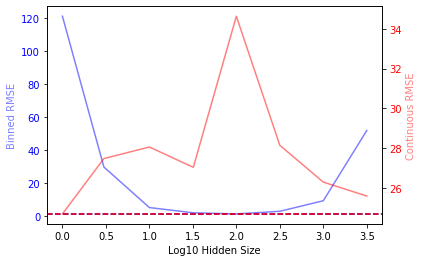

SIMULATION COMPLETED IN 116.86s


In [ ]:
hidden = [round(10**x) for x in np.arange(0, 4, 0.5)]
run_simulation(MC = 5, hidden_sizes = hidden, epochs=50)

Test to see how long a run will take with different numbers of epochs

STARTING SIMULATION WITH 30 SIZES...
--Begin Iteration 1 / 1
----Completed in 48.51s


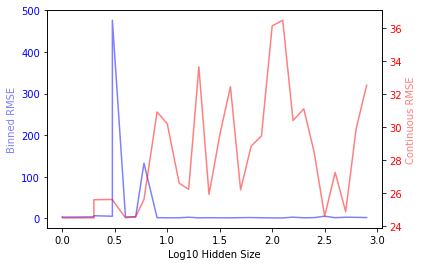

SIMULATION COMPLETED IN 48.75s


In [ ]:
hidden = [round(10**x) for x in np.arange(0, 3, 0.1)]
run_simulation(MC = 1, hidden_sizes=hidden)

# 10 epochs

STARTING SIMULATION WITH 30 SIZES...
--Begin Iteration 1 / 1
----Completed in 48.34s


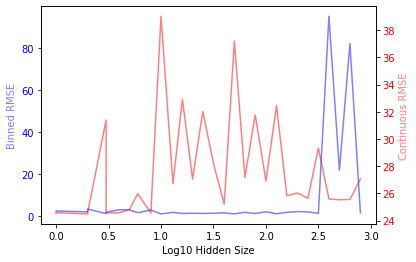

SIMULATION COMPLETED IN 48.58s


In [ ]:
hidden = [round(10**x) for x in np.arange(0, 3, 0.1)]
run_simulation(MC = 1, hidden_sizes=hidden, epochs=30)

STARTING SIMULATION WITH 30 SIZES...
--Begin Iteration 1 / 1
----Completed in 48.64s


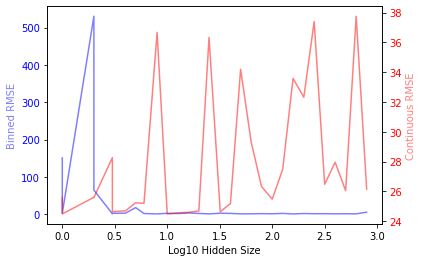

SIMULATION COMPLETED IN 48.89s


In [ ]:
hidden = [round(10**x) for x in np.arange(0, 3, 0.1)]
run_simulation(MC = 1, hidden_sizes=hidden, epochs=50)

STARTING SIMULATION WITH 7 SIZES...
--Begin Iteration 1 / 50
----Completed in 70.35s
--Begin Iteration 2 / 50
----Completed in 67.87s
--Begin Iteration 3 / 50
----Completed in 67.67s
--Begin Iteration 4 / 50
----Completed in 70.74s
--Begin Iteration 5 / 50
----Completed in 67.89s
--Begin Iteration 6 / 50
----Completed in 67.89s
--Begin Iteration 7 / 50
----Completed in 68.25s
--Begin Iteration 8 / 50
----Completed in 67.91s
--Begin Iteration 9 / 50
----Completed in 68.08s
--Begin Iteration 10 / 50
----Completed in 69.11s
--Begin Iteration 11 / 50
----Completed in 70.22s
--Begin Iteration 12 / 50
----Completed in 70.76s
--Begin Iteration 13 / 50
----Completed in 70.86s
--Begin Iteration 14 / 50
----Completed in 70.82s
--Begin Iteration 15 / 50
----Completed in 68.44s
--Begin Iteration 16 / 50
----Completed in 71.69s
--Begin Iteration 17 / 50
----Completed in 68.3s
--Begin Iteration 18 / 50
----Completed in 68.59s
--Begin Iteration 19 / 50
----Completed in 67.88s
--Begin Iteration 20 / 5

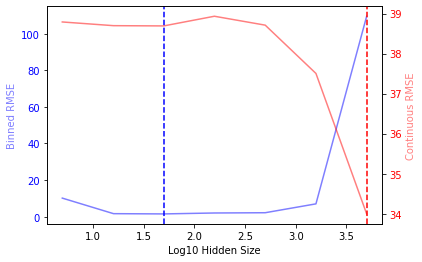

SIMULATION COMPLETED IN 3423.88s


In [ ]:
hidden = [round(10**x) for x in np.arange(0.7, 4, 0.5)]
run_simulation(MC = 50, hidden_sizes=hidden, epochs=50)

STARTING SIMULATION WITH 6 SIZES...
--Begin Iteration 1 / 10
----Completed in 678.32s
--Begin Iteration 2 / 10
----Completed in 675.62s
--Begin Iteration 3 / 10
----Completed in 633.53s
--Begin Iteration 4 / 10
----Completed in 638.2s
--Begin Iteration 5 / 10
----Completed in 637.37s
--Begin Iteration 6 / 10
----Completed in 632.93s
--Begin Iteration 7 / 10
----Completed in 631.0s
--Begin Iteration 8 / 10
----Completed in 630.52s
--Begin Iteration 9 / 10
----Completed in 629.6s
--Begin Iteration 10 / 10
----Completed in 630.05s
----Binned RMSE: 0      8.660580
1      2.003097
2      2.763899
3      1.821265
4    101.036232
5    338.115723
dtype: float32
----Cont RMSE: 0    39.429647
1    39.440889
2    38.927568
3    39.146371
4    34.299470
5    34.486445
dtype: float64


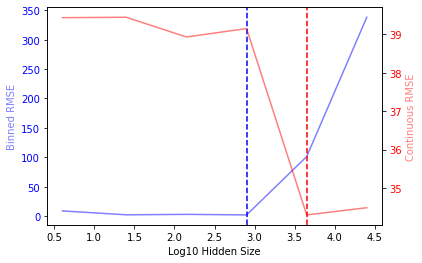

SIMULATION COMPLETED IN 6417.35s


In [ ]:
hidden = [round(10**x) for x in np.arange(0.65, 4.75, 0.75)]
run_simulation(MC = 10, hidden_sizes=hidden, epochs=50)